Sok-1005 Innlevering

Arbeidskrav 5 – nettskraping, datavask og lineær regresjonsmodell
I dette arbeidskravet er oppgaven og omentrent reprodusere resultatet fra arbeidskrav 2, men
nå gjøre alt arbeidet i Python i stedet for R.
Utgangspunktet er igjen denne nettsiden og tabellen under(utdrag/head) som illustrerer
forskjellen mellom leverandørers påståtte kjørelengde (WLTP) og Motor/NAFs faktiske
kjørelengde (STOP) på vinteren.


Oppgaven er den følgende:
1) Skrap nettsiden og lagre resultatet en i dataramme.
Hint: argumentet «on_bad_lines='skip'» kan være nyttig når du skal laste opp csv-
filen.
2) Vask dataen til en tabell med bare relevante tall og gode overskrifter. Her er det mange
veier til Rom, men en måte å gå fram på kan være den følgende:
- Del kolonnen med WLTP-tall i to: en for kjørte km og en for energibruk.
Hint: metodene «str.split()» og «drop()» kan være nyttige her.
- Fjern benevninger i alle kolonnene med relevante tall.
Hint: kommandoen «str.replace» kan være nyttig her.
- Noen rader i datarammen inneholder ikke gyldige verdier (Polestar og Hyundai),
og bør fjernes. Det kan gjøres med å sørge for at alle tallene faktisk er positive av
typen «float».
3) Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏 der WLTP-km er uavhengig
variabel, og plott modellen mot leverandørens påståtte kjørelengde. Resultatet skal bli
som i figuren under, men din kode skal inkludere origo i plottet.

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt


In [5]:
# Task 1 

url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find_all("table")

#I now convert this table to a dataframe
df = pd.read_html(str(table))[0]


#I rename first column to model
df.rename(columns={df.columns[0]: "Modell"}, inplace=True)

# i set modell as index
df.set_index("Modell", inplace=True)


# Replace all 'x' values with NaN
df.replace('x', np.nan, inplace=True)

# Drop any row that contains NaN
df.dropna(inplace=True)


# I split the WLTP-tall column at /
df[['WLTP-tall', 'WLTP-kWh']] = df['WLTP-tall'].str.split('/', expand=True)
df = df.drop(columns=['WLTP-kWh'])
df[['WLTP-tall', 'WLTP-kWh']] = df['WLTP-tall'].str.split(' ', expand=True)
df = df.drop(columns=['WLTP-kWh'])


df[['STOPP', 'stopp1']] = df['STOPP'].str.split(' ', expand=True)
df = df.drop(columns=['stopp1'])
df = df.drop(columns = ['Avvik'])


# I convert to float
df = df.astype(int)

df

,WLTP-tall,STOPP
Modell,,
Tesla Model 3 LR Dual motor,614,521
Mercedes-Benz EQS 580 4matic,645,513
BMW iX xDrive50,591,503
Tesla Model Y LR Dual motor,507,451
Volkswagen ID.3 PRO S,539,435
Kia EV6 2WD,528,429
NIO ES8 LR 7-seter,488,425
Kia EV6 4WD,484,423
Volkswagen ID.4 Pro,485,414


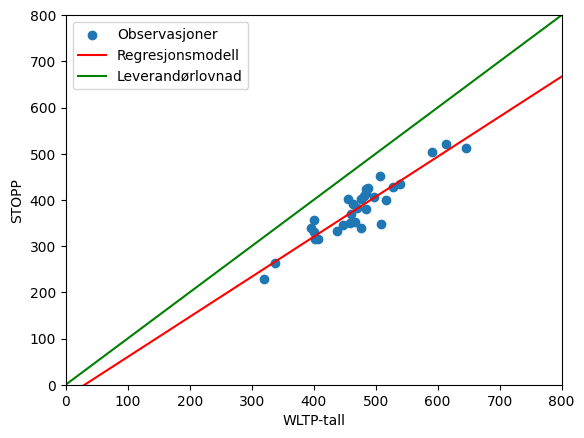

In [4]:

#I plot WLTP-tall on x and STOPP on y
fig, ax = plt.subplots()
ax.scatter(df['WLTP-tall'], df['STOPP'], label='Observasjoner')
#I make a line from origo that increases with 1
x = np.linspace(0, 800, 100)
y = x

#I make a regression model of type f(x) = ax+b
#I use polyfit to find a and b
a, b = np.polyfit(df['WLTP-tall'], df['STOPP'], 1)
#I plot the regression model
ax.plot(x, a*x+b, color='red', label='Regresjonsmodell')

ax.plot(x, y, color='green', label='Leverandørlovnad')


#I add y and x
ax.set_xlabel('WLTP-tall')
ax.set_ylabel('STOPP')
#I make the plot start at 0
ax.set_xlim(0, 800)
ax.set_ylim(0, 800)
#I add a legend
ax.legend();

